In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [35]:
from google.colab import files
uploaded = files.upload()

Saving Dry_Bean_Dataset.csv to Dry_Bean_Dataset.csv


In [36]:
dataset = pd.read_csv('Dry_Bean_Dataset.csv')
dataset.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [37]:
dataset.shape

(13611, 17)

In [38]:
dataset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
dataset=dataset.dropna(axis=0, how='any')

In [7]:
dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [8]:
dataset.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
dataset['AvgTemp'] = (dataset['Next_Tmax'] + dataset['Next_Tmin'])/2
dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,AvgTemp
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,25.15
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,26.50
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,27.50
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,28.00
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,22.65
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,22.55
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,23.20
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,23.70


In [11]:
dataset['Class'] = ["High" if x >26 else "Low" for x in dataset['AvgTemp']]
dataset


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,AvgTemp,Class
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,25.15,Low
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,26.50,High
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,27.50,High
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,28.00,High
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,26.85,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,22.65,Low
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,22.55,Low
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,23.20,Low
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,23.70,Low


In [12]:
dataset = dataset.drop(['Date'],axis=1)

<Axes: xlabel='Class', ylabel='count'>

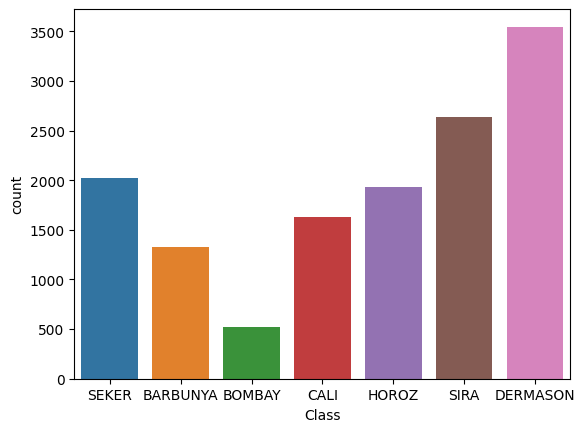

In [40]:
sns.countplot(x = 'Class', data=dataset)

In [41]:
X = dataset.iloc[:,0:-1]
y = dataset['Class']

In [42]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [43]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [17]:
samples

[(      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
  69       20.0          27.1          22.6    58.532623    99.541161   
  3746     22.0          27.0          23.8    65.640007    92.987854   
  4376      2.0          27.1          22.4    62.482933    93.729530   
  786      12.0          28.3          23.2    45.992992    84.653282   
  630       6.0          30.5          23.1    43.819996    88.618080   
  ...       ...           ...           ...          ...          ...   
  4992     18.0          30.6          24.6    48.130096    86.974968   
  3307      8.0          25.6          21.3    56.211494    72.446777   
  1693     19.0          29.3          22.0    32.470078    85.095413   
  2649     25.0          30.2          23.0    58.625172    83.594475   
  2774     25.0          26.4          24.0    68.687103    90.412285   
  
        LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
  69           28.071354         19.82633

### Creation of a Fitness Function

In [44]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [45]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [46]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.6 Best Kernel =  linear Best Nu =  6.85 Best Epsilon =  4.32
Best Accuracy =  0.62 Best Kernel =  linear Best Nu =  8.73 Best Epsilon =  4.24
Best Accuracy =  0.51 Best Kernel =  linear Best Nu =  0.64 Best Epsilon =  7.69
Best Accuracy =  0.38 Best Kernel =  poly Best Nu =  3.46 Best Epsilon =  1.97
Best Accuracy =  0.53 Best Kernel =  linear Best Nu =  5.24 Best Epsilon =  8.22
Best Accuracy =  0.39 Best Kernel =  linear Best Nu =  7.01 Best Epsilon =  0.17
Best Accuracy =  0.48 Best Kernel =  linear Best Nu =  7.59 Best Epsilon =  9.86
Best Accuracy =  0.24 Best Kernel =  linear Best Nu =  5.96 Best Epsilon =  4.99
Best Accuracy =  0.24 Best Kernel =  linear Best Nu =  3.62 Best Epsilon =  2.31
Best Accuracy =  0.21 Best Kernel =  rbf Best Nu =  6.48 Best Epsilon =  8.05


###Creation of a Result Table

In [47]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.60,linear,6.85,4.32
1,2,0.62,linear,8.73,4.24
2,3,0.51,linear,0.64,7.69
3,4,0.38,poly,3.46,1.97
4,5,0.53,linear,5.24,8.22
5,6,0.39,linear,7.01,0.17
6,7,0.48,linear,7.59,9.86
7,8,0.24,linear,5.96,4.99
8,9,0.24,linear,3.62,2.31
9,10,0.21,rbf,6.48,8.05


### Plotting of the Convergence Graph/Linear Curve

In [48]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [49]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [50]:
train_sizes

array([  85,  258,  432,  605,  778,  951, 1125, 1298, 1471, 1644, 1818,
       1991, 2164, 2337, 2510, 2684, 2857, 3030, 3203, 3377, 3550, 3723,
       3896, 4070, 4243, 4416, 4589, 4762, 4936, 5109, 5282, 5455, 5629,
       5802, 5975, 6148, 6322, 6495, 6668, 6841, 7014, 7188, 7361, 7534,
       7707, 7881, 8054, 8227, 8400, 8574])

In [51]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

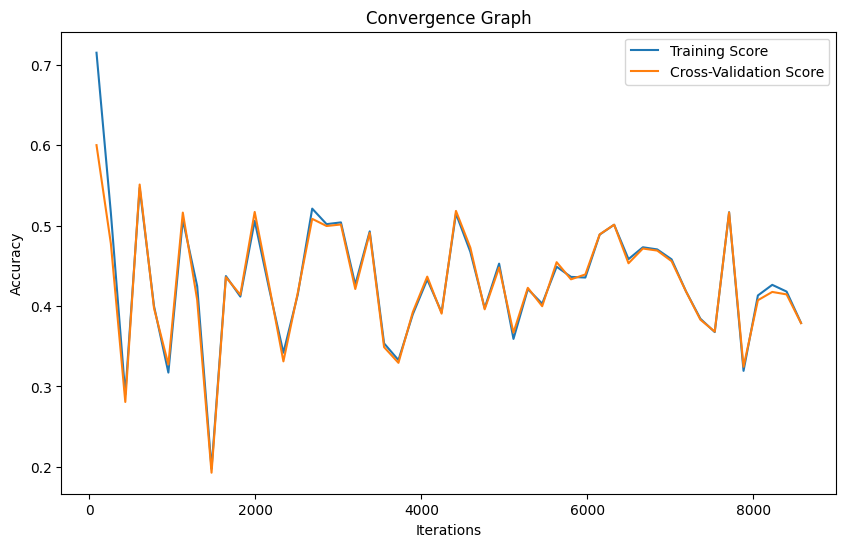

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:

def utils_recognize_type(dataset, col, max_cat=20):
    if (dataset[col].dtype == "O") | (dataset[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [55]:
dic_cols = {col:utils_recognize_type(dataset, col, max_cat=20) for col in dataset.columns}
print(dic_cols)

{'Area': 'num', 'Perimeter': 'num', 'MajorAxisLength': 'num', 'MinorAxisLength': 'num', 'AspectRation': 'num', 'Eccentricity': 'num', 'ConvexArea': 'num', 'EquivDiameter': 'num', 'Extent': 'num', 'Solidity': 'num', 'roundness': 'num', 'Compactness': 'num', 'ShapeFactor1': 'num', 'ShapeFactor2': 'num', 'ShapeFactor3': 'num', 'ShapeFactor4': 'num', 'Class': 'cat'}


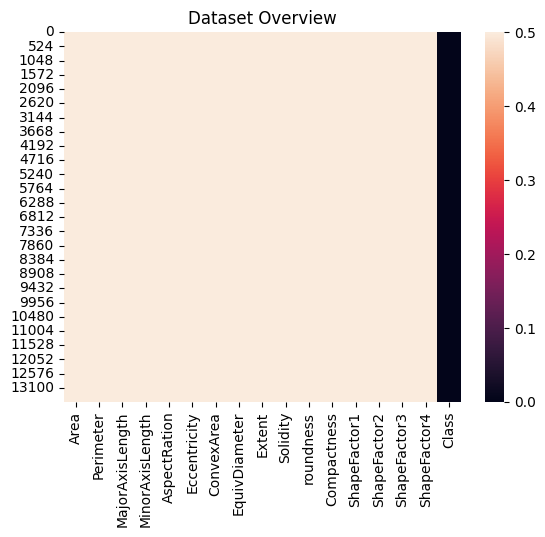

In [56]:
heatmap = dataset.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap).set_title('Dataset Overview')
plt.show()

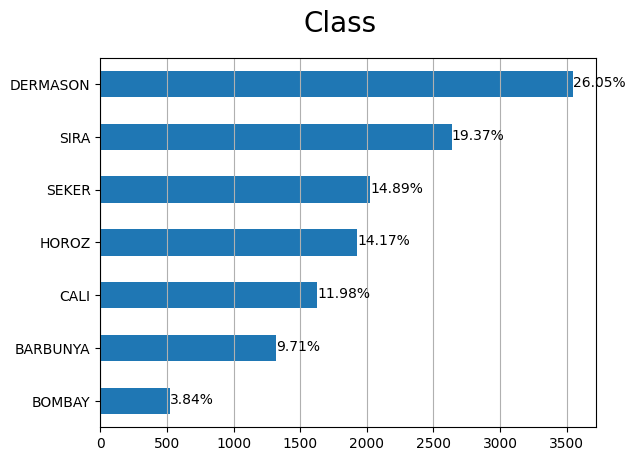

In [57]:
y = "Class"
ax = dataset[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [59]:
mean1=dataset.groupby('Class', as_index=False)['ShapeFactor1','ShapeFactor2'].mean()
mean1

,Class,ShapeFactor1,ShapeFactor2
0,BARBUNYA,0.005357,0.001394
1,BOMBAY,0.003442,0.000844
2,CALI,0.005459,0.001107
3,DERMASON,0.007755,0.002161
4,HOROZ,0.007007,0.001048
5,SEKER,0.006334,0.002541
6,SIRA,0.006720,0.001683


<Axes: xlabel='Class'>

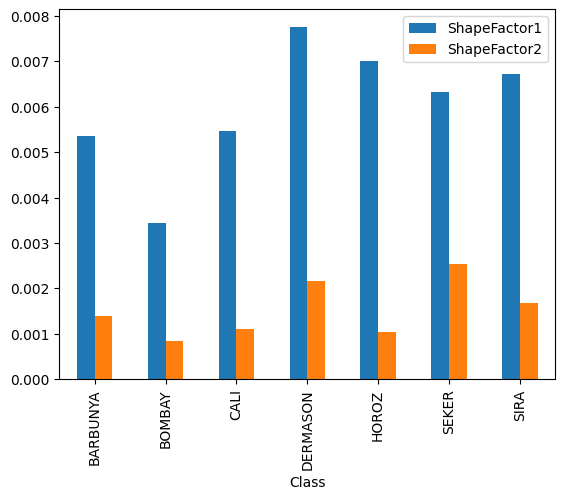

In [60]:
mean1.plot(x="Class", y=["ShapeFactor1", "ShapeFactor2"], kind="bar")

      Class           Area
0  BARBUNYA   69804.133132
1    BOMBAY  173485.059387
2      CALI   75538.211043
3  DERMASON   32118.710942
4     HOROZ   53648.508817
5     SEKER   39881.299951
6      SIRA   44729.128604


<Axes: xlabel='Class'>

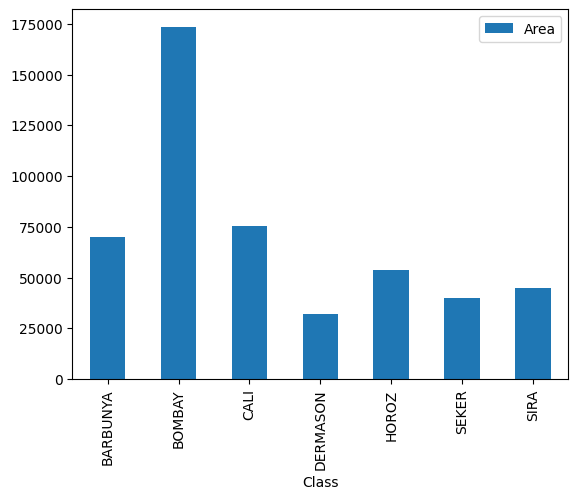

In [62]:
mean2=dataset.groupby('Class', as_index=False)['Area'].mean()
print(mean2)
mean2.plot(x="Class",y="Area",kind='bar')

      Class  roundness
0  BARBUNYA   0.800200
1    BOMBAY   0.864421
2      CALI   0.845934
3  DERMASON   0.908114
4     HOROZ   0.794420
5     SEKER   0.944508
6      SIRA   0.884652


<Axes: xlabel='Class'>

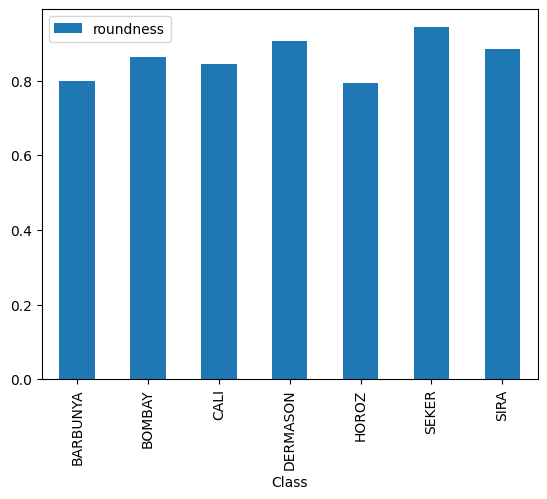

In [64]:
mean3=dataset.groupby('Class', as_index=False)['roundness'].mean()
print(mean3)
mean3.plot(x="Class",y="roundness",kind='bar')

Text(0.5, 1.0, 'pearson correlation')

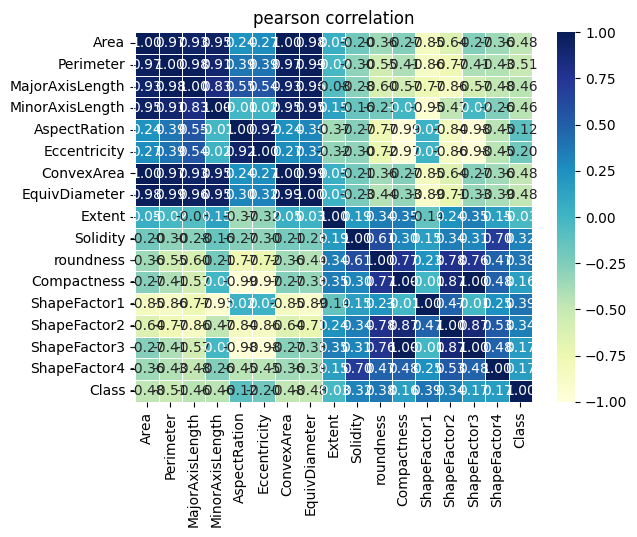

In [66]:
corr_matrix = dataset.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.6)
plt.title("pearson correlation")